# 双轴图

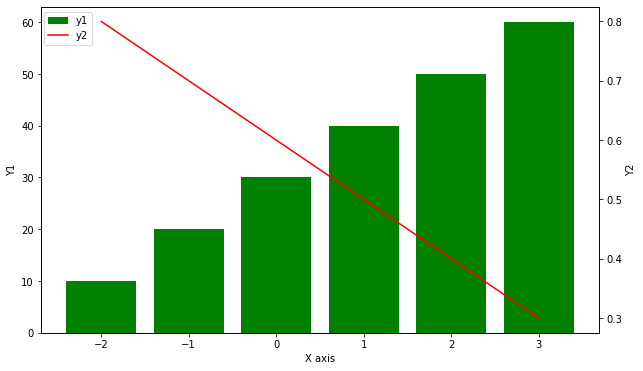

In [3]:
import matplotlib.pyplot as plt
import pandas as pd 

## Data
df = pd.DataFrame([
    [-2, 10, 0.8],
    [-1, 20, 0.7], 
    [0, 30, 0.6],
    [1, 40, 0.5],
    [2, 50, 0.4],
    [3, 60, 0.3]
], columns=['x', 'y1', 'y2'])

## Visualization
fig = plt.figure(figsize=(10, 6))

ax1 = fig.add_subplot(111)
ax1.bar(df.x, df.y1, color='g', label='y1')

ax2 = ax1.twinx()
ax2.plot(df.x, df.y2, color='r', label='y2')

## Legend
fig.legend(loc=1, bbox_to_anchor=(0.1, 1), bbox_transform=ax1.transAxes)

ax1.set_xlabel(r"X axis")
ax1.set_ylabel(r"Y1")
ax2.set_ylabel(r"Y2")

plt.savefig('Twin_Xaxes.jpg', dpi=400)
plt.show()

# 堆叠柱状图

In [9]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = sns.load_dataset('diamonds')
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
df.cut.unique()

['Ideal', 'Premium', 'Good', 'Very Good', 'Fair']
Categories (5, object): ['Ideal', 'Premium', 'Very Good', 'Good', 'Fair']

In [4]:
df.clarity.unique()

['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF']
Categories (8, object): ['IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1']

In [5]:
df.color.unique()

['E', 'I', 'J', 'H', 'F', 'G', 'D']
Categories (7, object): ['D', 'E', 'F', 'G', 'H', 'I', 'J']

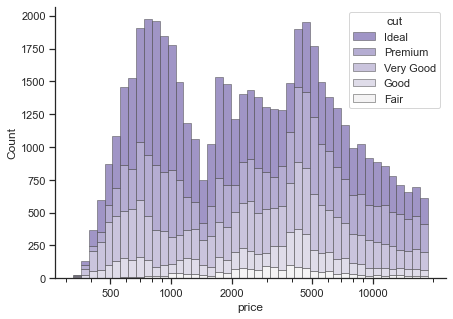

In [10]:
sns.set_theme(style='ticks')
f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)

sns.histplot(
    df,
    x='price',
    hue='cut',
    multiple='stack', ## 堆叠
    palette='light:m_r',
    edgecolor='.3',
    linewidth=.5,
    log_scale=True,
)
ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
ax.set_xticks([500, 1000, 2000, 5000, 10000])

plt.savefig('histplot_stack.jpg', dpi=400)
plt.show()

In [11]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

ValueError: Could not interpret value `price` for parameter `x`

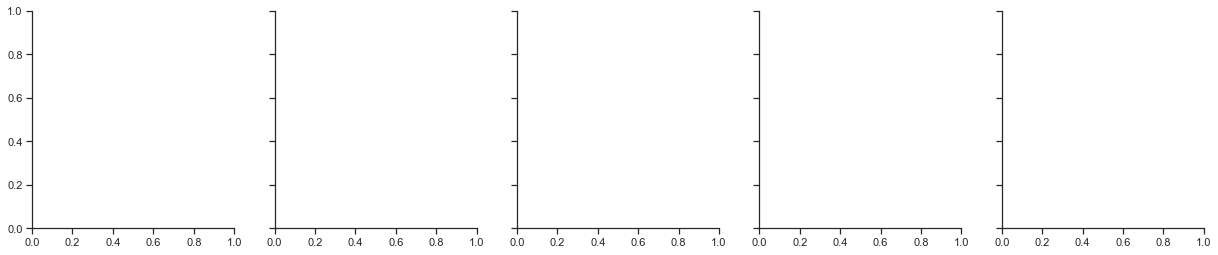

In [25]:
group_list = list(df1.cut.unique())

sns.set_theme(style='ticks')
f, ax = plt.subplots(figsize=(21, 4), nrows=1, ncols=len(group_list), sharey='all')
sns.despine(f)

i= 0

for group in group_list:
    df0 = df1[df1.cut == group].reset_index(drop=True)
    sns.histplot(
        data=df0,
        x='price',
        hue='color',
        multiple='stack',
        palette='light:m_r',
        ax=ax[i]
    )
    i += 1
plt.savefig('subplot_histplot_stack.png', dpi=400)
plt.show()

In [21]:
df1 = df.groupby(['clarity', 'cut', 'color']).agg({
    'carat': 'count'
}).reset_index()
df1.rename(columns={
    'carat': 'sample_cnt'
}, inplace=True)
df1

,clarity,cut,color,sample_cnt
0,IF,Ideal,D,28
1,IF,Ideal,E,79
2,IF,Ideal,F,268
3,IF,Ideal,G,491
4,IF,Ideal,H,226
...,...,...,...,...
275,I1,Fair,F,35
276,I1,Fair,G,53
277,I1,Fair,H,52
278,I1,Fair,I,34


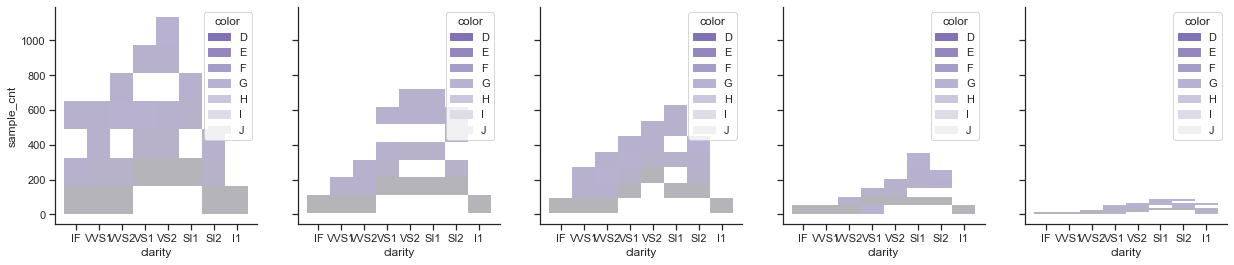

In [23]:
df1 = df.groupby(['clarity', 'cut', 'color']).agg({
    'carat': 'count'
}).reset_index()
df1.rename(columns={
    'carat': 'sample_cnt'
}, inplace=True)

group_list = list(df1.cut.unique())

sns.set_theme(style='ticks')
f, ax = plt.subplots(figsize=(21, 4), nrows=1, ncols=len(group_list), sharey='all')
sns.despine(f)

i= 0

for group in group_list:
    df0 = df1[df1.cut == group].reset_index(drop=True)
    sns.histplot(
        data=df0,
        x='clarity',
        y='sample_cnt',
        hue='color',
        multiple='stack',
        palette='light:m_r',
        ax=ax[i]
    )
    i += 1
plt.savefig('subplot_histplot_stack.png', dpi=400)
plt.show()